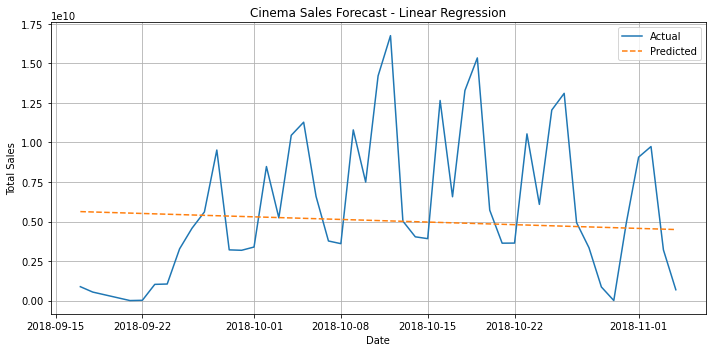

Mean Squared Error: 2.1967658475408286e+19


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv("C:\\Users\\exam\\Downloads\\archive (13)\\cinemaTicket_Ref.csv")

df['date'] = pd.to_datetime(df['date'])

daily_df = df.groupby('date')['total_sales'].sum().reset_index()

daily_df = daily_df.sort_values('date')
daily_df['Time'] = (daily_df['date'] - daily_df['date'].min()).dt.days

X = daily_df[['Time']]
y = daily_df['total_sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(daily_df['date'].iloc[-len(y_test):], y_test, label='Actual')
plt.plot(daily_df['date'].iloc[-len(y_test):], y_pred, label='Predicted', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Cinema Sales Forecast - Linear Regression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
